# Оригинальная сетка с канала selfedu
https://www.youtube.com/watch?v=wDwnC0hBJ_A&list=PLA0M1Bcd0w8yv0XGiF1wjerjSZVSrYbjh&index=24

Маленький датасет и нет разделения на test и train ноубуки

In [1]:
import numpy as np
import re

from tensorflow.keras.layers import Dense, LSTM, Input, Dropout, Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [2]:
def sequence_to_text(list_of_indices):
    words = [reverse_word_map.get(letter) for letter in list_of_indices]
    return(words)

In [3]:
with open('train_data_true(small data set)', 'r', encoding='utf-8') as f:
    texts_true = f.readlines()
    texts_true[0] = texts_true[0].replace('\ufeff', '') #убираем первый невидимый символ

with open('train_data_false(small data set)', 'r', encoding='utf-8') as f:
    texts_false = f.readlines()
    texts_false[0] = texts_false[0].replace('\ufeff', '') #убираем первый невидимый символ

In [4]:
texts = texts_true + texts_false
count_true = len(texts_true)
count_false = len(texts_false)
total_lines = count_true + count_false
print(count_true, count_false, total_lines)

84 88 172


In [5]:
maxWordsCount = 1000
tokenizer = Tokenizer(num_words=maxWordsCount, 
                      filters='!–"—#$%&amp;()*+,-./:;<=>?@[\\]^_`{|}~\t\n\r«»', 
                      lower=True, 
                      split=' ', 
                      char_level=False)

tokenizer.fit_on_texts(texts)

reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))
print(reverse_word_map)

{1: 'не', 2: 'и', 3: 'в', 4: 'вы', 5: 'на', 6: 'я', 7: 'а', 8: 'только', 9: 'что', 10: 'все', 11: 'это', 12: 'если', 13: 'жизнь', 14: 'просто', 15: 'с', 16: 'чем', 17: 'никогда', 18: 'чтобы', 19: 'к', 20: 'у', 21: 'больше', 22: 'себя', 23: 'то', 24: 'всегда', 25: 'вас', 26: 'меня', 27: 'за', 28: 'вам', 29: 'когда', 30: 'от', 31: 'мне', 32: 'быть', 33: 'жизни', 34: 'есть', 35: 'но', 36: 'сделать', 37: 'без', 38: 'позитивным', 39: 'никому', 40: 'как', 41: 'ты', 42: 'тем', 43: 'для', 44: 'день', 45: 'позитивное', 46: 'своих', 47: 'мы', 48: 'много', 49: 'тебя', 50: 'никто', 51: 'такой', 52: 'деньги', 53: 'денег', 54: 'позитивно', 55: 'свою', 56: 'которые', 57: 'значит', 58: 'так', 59: 'них', 60: 'мечты', 61: 'нужно', 62: 'того', 63: 'ничего', 64: 'лучше', 65: 'надо', 66: 'верьте', 67: 'понедельник', 68: 'живи', 69: 'позволяйте', 70: 'хорошее', 71: 'можете', 72: 'ваши', 73: 'других', 74: 'делай', 75: 'тебе', 76: 'можешь', 77: 'успеха', 78: 'ваша', 79: 'стоит', 80: 'себе', 81: 'своей', 82: '

In [6]:
dist = list(tokenizer.word_counts.items())
print(dist[:10])
print(texts[0][:100])

[('думайте', 1), ('позитивно', 4), ('и', 50), ('верьте', 3), ('в', 38), ('свою', 4), ('способность', 1), ('достигать', 1), ('отличных', 1), ('результатов', 1)]
Думайте позитивно и верьте в свою способность достигать отличных результатов. 



In [7]:
max_text_len = 10
data = tokenizer.texts_to_sequences(texts)
data_pad = pad_sequences(data, maxlen = max_text_len)
print(data_pad)

#print( list(tokenizer.word_index.items()) )

[[197  54   2 ... 199 200 201]
 [  0   4 202 ... 205   3  67]
 [206   3  67 ...   4 208 209]
 ...
 [  0  20  62 ...  53 850 851]
 [  0   0  43 ...  33   1 853]
 [  0   0   0 ...  70  65 194]]


In [8]:
X = data_pad
Y = np.array([[1, 0]]*count_true + [[0, 1]]*count_false)
print(X.shape, Y.shape)

indeces = np.random.choice(X.shape[0], size=X.shape[0], replace=False)
X = X[indeces]
Y = Y[indeces]

print(data_pad.shape)
print("indeces: ", indeces)

(172, 10) (172, 2)
(172, 10)
indeces:  [ 33  76  37 151 107  86 115 171 160  53  75  42   1  65  54 132  71 156
 125  96 129 164  60 144 158 136 131  56 152  50  70 162  78  24  82 147
  12  69 138 124 120 105  88   3  25  28  15 153  52  81 106 113  40  38
 122  17  66  47 141  30 103 118 109  90 163  73  72  39  97 104  10  93
 165 123 146  49  21  68  31  89  48  45  13  26  83   7 119   4  36 114
 140 167   6  74 154  57 148  98 150  23 108 139  67  64 159 137 145  32
 101  61 127   2 149  46  14 135  44   5  80  20  16 121 170   0 169  99
  84  79  51 166 111 102 110  19  34 161   9  63  43  95 142  94 117 133
  92  27  22 155  58  55 130  35 112 143  59 116 126  91  62 134  29  85
  41 157 128  18  87  77 100   8  11 168]


In [9]:
print(X.shape)

(172, 10)


In [10]:
model = Sequential()
model.add(Embedding(maxWordsCount, 128, input_length = max_text_len))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(2, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 128)           128000    
_________________________________________________________________
lstm (LSTM)                  (None, 10, 128)           131584    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 2)                 130       
Total params: 309,122
Trainable params: 309,122
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam(0.0001))

In [12]:
history = model.fit(X, Y, batch_size=32, epochs=50, validation_split=0.15)

Epoch 1/50
5/5 [==============================] - 1s 140ms/step - loss: 0.6944 - accuracy: 0.3904 - val_loss: 0.6928 - val_accuracy: 0.4231
Epoch 2/50
5/5 [==============================] - 0s 7ms/step - loss: 0.6921 - accuracy: 0.5890 - val_loss: 0.6908 - val_accuracy: 0.6538
Epoch 3/50
5/5 [==============================] - 0s 6ms/step - loss: 0.6897 - accuracy: 0.7055 - val_loss: 0.6888 - val_accuracy: 0.6154
Epoch 4/50
5/5 [==============================] - 0s 7ms/step - loss: 0.6875 - accuracy: 0.7123 - val_loss: 0.6864 - val_accuracy: 0.5385
Epoch 5/50
5/5 [==============================] - 0s 8ms/step - loss: 0.6847 - accuracy: 0.7534 - val_loss: 0.6841 - val_accuracy: 0.5769
Epoch 6/50
5/5 [==============================] - 0s 8ms/step - loss: 0.6816 - accuracy: 0.7603 - val_loss: 0.6812 - val_accuracy: 0.6538
Epoch 7/50
5/5 [==============================] - 0s 7ms/step - loss: 0.6782 - accuracy: 0.7945 - val_loss: 0.6774 - val_accuracy: 0.6538
Epoch 8/50
5/5 [================

In [13]:
#reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))

In [14]:
t = "негативы".lower()
data = tokenizer.texts_to_sequences([t])
print(data)
data_pad = pad_sequences(data, maxlen=max_text_len)
print( sequence_to_text(data[0]) )

res = model.predict(data_pad)
print(res, np.argmax(res), sep='\n')

[[360]]
['негативы']
[[0.22921918 0.7707808 ]]
1


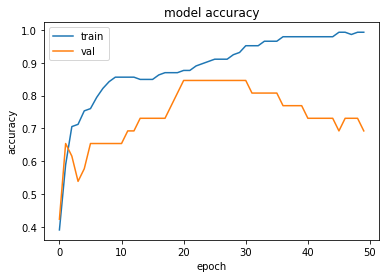

In [15]:
# Вывод графика изменения ошибки
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

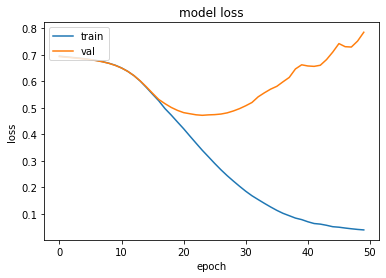

In [16]:
# Вывод графика изменения ошибки
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()